In [1]:
import pandas as pd
import re
import nltk
from sklearn.utils import shuffle 
nltk.download('stopwords')
from nltk.corpus import stopwords
import random
df = pd.read_csv('lyrics.csv')
df.info()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6281 entries, 0 to 6280
Data columns (total 2 columns):
lyric    6281 non-null object
label    6281 non-null object
dtypes: object(2)
memory usage: 98.3+ KB


In [2]:

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras import optimizers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout,GlobalMaxPooling1D
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('portuguese'))
from bs4 import BeautifulSoup
import plotly.graph_objs as go
import plotly.plotly as py
import cufflinks
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional


Using TensorFlow backend.


ImportError: ignored

In [3]:
df.head()

,lyric,label
0,"Vou dar a volta no mundo eu vou, vou ver o mun...",axe
1,Nós duas Nós nuas E o nosso amor à toa Na boa ...,axe
2,Quem sabe nem era pra ser nossa Aquela lua aqu...,axe
3,Já são cinco da manhã E não dormi quase nada S...,axe
4,Amor de verdade eu só senti Foi com você meu b...,axe


In [4]:
pip install langdetect


     |████████████████████████████████| 1.0MB 9.7MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.7-cp36-none-any.whl size=993460 sha256=673405951b27a09c7f36e49e3185db7a7b8def5c1d923169237525cd29ce80a6
  Stored in directory: /root/.cache/pip/wheels/ec/0c/a9/1647275e7ef5014e7b83ff30105180e332867d65e7617ddafe
Successfully built langdetect


In [0]:
def cat_to_num(label):
    if label == 'axe':
        label = 0
    elif label == 'sertanejo':
        label = 1
    elif label == 'gospelreligioso':
        label = 2
    elif label == 'bossa-nova':
        label = 3
    elif label == 'forro':
        label = 4
    elif label == 'mpb':
        label = 5
    elif label == 'samba':
        label = 6
    
    return label

In [0]:
def num_to_cat(label):
    if label == 0:
        label = 'axe'
    elif label == 1:
        label = 'sertanejo'
    elif label == 2:
        label = 'gospelreligioso'
    elif label == 3:
        label = 'bossa-nova'
    elif label == 4:
        label = 'forro'
    elif label == 5:
        label = 'mpb'
    elif label == 6:
        label = 'samba'
    
    return label

In [0]:
#df['label'] = df['label'].apply(lambda l: cat_to_num(l))
df = shuffle(df)

In [0]:
to_drop = []
for lyric, index in zip(df.lyric, df.index):
    if len(str(lyric)) <= 5:
        to_drop.append(index)
        
#df.loc[1026]
df.drop(to_drop, inplace=True)

In [9]:

from langdetect import detect

not_pt = []

for lyric, index in zip(df.lyric, df.index):
    #print(index)
    #print(detect(lyric))
    if(detect(lyric) != 'pt'):
        not_pt.append(index)

print(len(not_pt))

281


In [0]:

df.drop(not_pt, inplace=True)

In [11]:
df.label.value_counts()

sertanejo          895
forro              891
mpb                889
samba              886
gospelreligioso    874
bossa-nova         801
axe                763
Name: label, dtype: int64

In [12]:
def print_plot(index):
    example = df[df.index == index][['label', 'lyric']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Letra:', example[1])
print_plot(10)

axe
Letra: Essa novinha quando chega, a galera enlouquece Perna grossa rabetão, linda igual mulher de chefe Abri a roda que ela dança, eita que mina gostosa Manos pira nessa bunda, que novinha cabulosa    Desse desse desse desse, delícia que gostosa Vem quebrar pro seu malvado, novinha cabulosa    


In [0]:

df= df.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('portuguese'))

def clean_text(text):
 
    text = text.lower() # lowercase text
    #text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    #text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = re.sub(r'\W+', ' ', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
  
df['lyric'] = df['lyric'].apply(clean_text)


In [0]:
df['lyric'] = df['lyric'].str.replace('\d+', '')

In [15]:
print_plot(100)

forro
Letra: reisado ciranda imaginário popular vaquejada batucada alto bumba boi bumbá morte vida severina casa grande senzala auto compadecida ariano suassuna joão cabral páginas retratos dessa vida joão grilo cancão fogo padre ciço lampião banda cabaçal novena renovação espinho fulô cante lá canto cá patativa assaré cavalhada candomblé nau catarineta cantoria cavalhada fandango marujada forró arrasta pé frevo manguebeach maracatu pastoril luiz gonzaga folclore cultura brasil frevo manguebeach maracatu pastoril luiz câmara cascudo cultura brasil frevo manguebeach maracatu pastoril pinto monteiro cultura brasil frevo manguebeach maracatu pastoril cego aderaldo cultura brasil


In [0]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 200
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['lyric'].values)
word_index = tokenizer.word_index
#print(word_index)
#print('Found %s unique tokens.' % len(word_index))

In [17]:
X = tokenizer.texts_to_sequences(df['lyric'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)


Shape of data tensor: (5999, 200)


In [18]:
Y = pd.get_dummies(df['label']).values
print('Shape of label tensor:', Y.shape)


Shape of label tensor: (5999, 7)


In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(4799, 200) (4799, 7)
(1200, 200) (1200, 7)


In [20]:

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1], trainable=True))
model.add(LSTM(128, activation='sigmoid', return_sequences=True))
model.add(Dropout(0.5))
model.add(GlobalMaxPooling1D())
model.add(Dense(7, activation='softmax'))
optimizer = optimizers.RMSprop(lr=0.01)
#optimizer = optimizers.adam(lr=0.01)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['acc'])





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [25]:

epochs = 10
batch_size = 16

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1)

Train on 4319 samples, validate on 480 samples
Epoch 1/10
4319/4319 [==============================] - 88s 20ms/step - loss: 0.7114 - acc: 0.7747 - val_loss: 1.6419 - val_acc: 0.4333
Epoch 2/10
4319/4319 [==============================] - 88s 20ms/step - loss: 0.5275 - acc: 0.8421 - val_loss: 1.8856 - val_acc: 0.4167
Epoch 3/10
4319/4319 [==============================] - 89s 21ms/step - loss: 0.3987 - acc: 0.8777 - val_loss: 1.8897 - val_acc: 0.4271
Epoch 4/10
4319/4319 [==============================] - 88s 20ms/step - loss: 0.3248 - acc: 0.9092 - val_loss: 2.1053 - val_acc: 0.4104
Epoch 5/10
4319/4319 [==============================] - 86s 20ms/step - loss: 0.2739 - acc: 0.9227 - val_loss: 1.9293 - val_acc: 0.4437
Epoch 6/10
4319/4319 [==============================] - 81s 19ms/step - loss: 0.2389 - acc: 0.9396 - val_loss: 1.8889 - val_acc: 0.4896
Epoch 7/10
4319/4319 [==============================] - 87s 20ms/step - loss: 0.2025 - acc: 0.9470 - val_loss: 2.2679 - val_acc: 0.4333
E

In [27]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

1200/1200 [==============================] - 2s 2ms/step
Test set
  Loss: 2.011
  Accuracy: 0.487


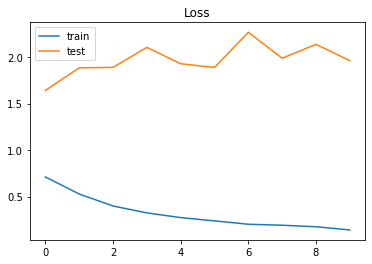

In [28]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

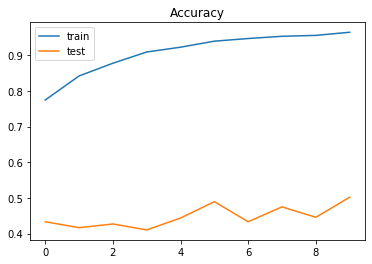

In [29]:
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();

In [30]:

new_complaint = ['Não dá pra entender o meu coração Mudou de amizade pra louca paixão Então foi dessa forma que eu percebi Não quero te assustar ou me iludir']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)

pred = model.predict(padded)
labels = ['sertanejo','forro','mpb','samba','gospelreligioso','bossa-nova','axe']       
print(labels[np.argmax(pred)])

sertanejo


Confusion Matrix
Confusion matrix, without normalization


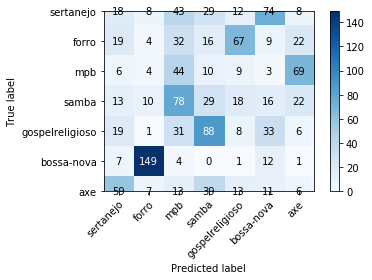

In [40]:

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.utils.multiclass import unique_labels
#Y_pred = model.predict(X_test,Y_test)
#y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
#print(confusion_matrix(validation_generator.classes, y_pred))

yhat = model.predict_classes(X_test)
Y_true = []
for x in Y_test:
   Y_true.append(labels[np.argmax(x)])
Y_pred = []
for y in yhat:
  Y_pred.append(num_to_cat(y))
  
#yhat = yhat.apply(lambda l: num_to_cat(l))
#print(len(Y_test))
#print(yhat)
#print(Y_pred)
#print(Y_true)
#print(labels)

plot_confusion_matrix(Y_true, Y_pred, classes=labels,
                      title='')


In [33]:
print(classification_report(Y_true, Y_pred,labels=labels))

                 precision    recall  f1-score   support

      sertanejo       0.04      0.04      0.04       148
          forro       0.18      0.30      0.23       145
            mpb       0.06      0.04      0.05       186
          samba       0.08      0.07      0.07       174
gospelreligioso       0.14      0.16      0.15       186
     bossa-nova       0.02      0.02      0.02       169
            axe       0.13      0.09      0.11       192

       accuracy                           0.10      1200
      macro avg       0.09      0.10      0.10      1200
   weighted avg       0.09      0.10      0.09      1200



In [0]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title =''

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title='',
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax